# Uplift Modeling Customer Email Data

* In this notebook, we are going to explore [Kevin Hillstorm Email Marketing Dataset](https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html), which contains <b>outcome (Visit, Conversion and Spend) for 64,000 customers, along with other attributes such as gender, channel, historical segment, recency and zip-code type, along with Actual Marketing segments.</b>


* The dataset lays itself perfectly for <b>Uplift Modeling and Marketing Mixture Models</b>. Given we know treatment and control groups along with outcome and other features, we can choose customers for further targeting by using Uplift Modeling to maximize ROI. To understand individual contributing effects of these features towards Dollar amount spent, we can apply Mixture Models along with interesting interaction terms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', None)
df = pd.read_csv('causal/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv', )
df['history_segment'] = df['history_segment'].apply(lambda x: str(x)[2:])
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,$100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,$200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,$100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,$500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,$0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


### Quick EDA

* We observe that there are <b> 2 Experimental segments, </b> with equal number of customers in <b> Womens Email Campaign, Mens Email Campaign and Control Segment</b>. We have <b>receny</b> of customer, denoting number of months since last purchase (ranges from 1 to 12 months)


* We also have the <b>aggregated total dollars spent</b> within the last 12 months on the website, and also a corresponding <b>history segment attribute</b>. From the distribution plot below, we observe that most of the purchases made fall within 0-100 Dollar segment and decreases with an increase in Dollar amount spent.


* We observe that we have almost equal number of <b>newbies</b> within the last 12 months, as old users of the webiste. We observe that there are more customer from <b>Sub-Urban Zip-codes, followed by Urban, followed by Rural</b>.

In [2]:
df.segment.value_counts()

Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: segment, dtype: int64

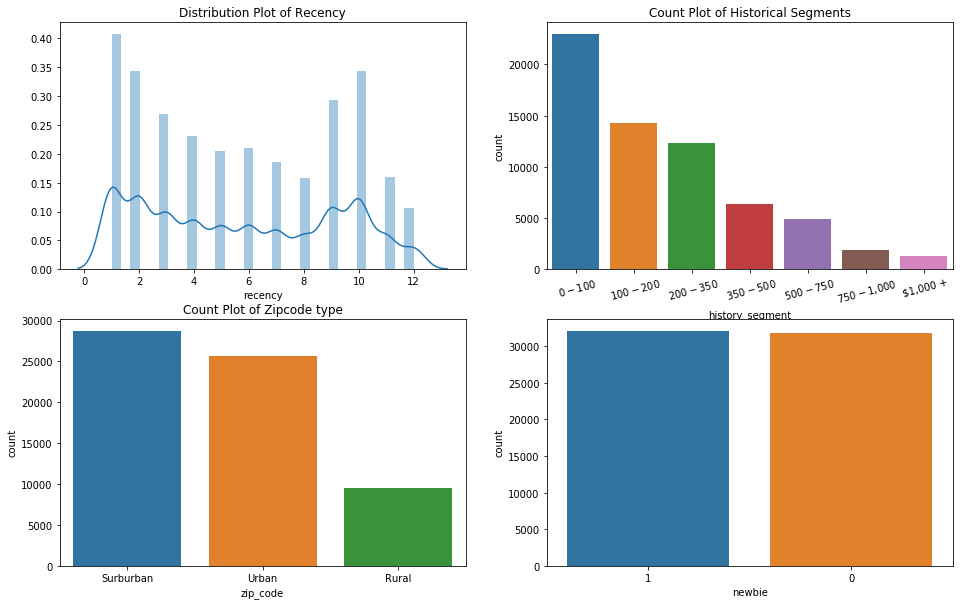

In [3]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.distplot(df.recency); plt.title('Distribution Plot of Recency')

plt.subplot(2,2,2); plt.title('Count Plot of Historical Segments')
sns.countplot(df.history_segment, order=df.history_segment.value_counts().index)
plt.xticks(rotation=15)

plt.subplot(2,2,3); plt.title('Count Plot of Zipcode type')
sns.countplot(df.zip_code, order=df.zip_code.value_counts().index)

plt.subplot(2,2,4);
sns.countplot(df.newbie, order=df.newbie.value_counts().index)

## Outcome Variables of Interest

We are now interested to see customer behaviour across segments. <b>Visit attribute</b> is set to 1 when customer visits webiste within 2 weeks of Email marketing. We observe that without any marketing at all, <b> 10 % of customer visit the website & 5 of every 1000 customers make purchase</b>.

We see that maximum visits, conversion rate and spend is across <b>Mens E-Mail Segment</b>, followed by <b>Womens E-Mail Segment</b> and then <b>No-Email</b> Segment.

In [9]:
df.pivot_table(values=['visit', 'conversion', 'spend'],
               index='segment',
               aggfunc=[np.mean],
               margins=True)

mean                    
              conversion     spend     visit
segment                                     
Mens E-Mail     0.012531  1.422617  0.182757
No E-Mail       0.005726  0.652789  0.106167
Womens E-Mail   0.008837  1.077202  0.151400
All             0.009031  1.050908  0.146781